# <center>第一次作业：涡扇发动机性能</center>
### <center>011810422 包晨宇</center>
## 1.定义基本量

(1).$\rho^s$:海平面空气密度(the air density at the sea level)

(2).$\rho$:飞机所处的大气环境中的空气密度(the air density at the altitude of flight)

(3).$\delta_t$:油门开度($0<\delta_t<1$)

(4).$P$:可供给飞机的功率(power available for flight)

(5).$P_max^s$:额定最大功率(rated maximim power)

(6).$\eta$:螺桨效率(propeller efficiency)

(7).$m$:空气密度指数，$m>0$(the dimensionless air density exponent is a characteristic of the internal combustion engine)

(8).$T$:推力($Thrust$)

(9).$T^s_{max}$:额定最大推力

(10).$V$:速度$V$

(11).$\frac{dW}{dt}$:燃油消耗率(fuek flow rate/the weight of fuel burned per unit of time)

(12).$c$:比燃率(power specific fuel consumption rate)

## 2.计算公式
(1).推力$T$,空气密度$\rho$,油门开度$\delta_t$关系：
$$
T=\delta_t \cdot (\frac{\rho}{\rho^s})^m \cdot T^s_{max}
\tag{2.1.1}
$$

由于$0 \leq \delta_t \leq 1$,所以可以推得：
$$
0 \leq T \leq (\frac{\rho}{\rho^s})^m \cdot T^s_{max}
\tag{2.1.2}
$$

(2).功率$P$,空气密度$\rho$,油门开度$\delta_t$,速度$V$关系
$$
P=\delta_t \cdot (\frac{\rho}{\rho^s})^m \cdot T^s_{max} V
\tag{2.2.1}
$$

和式$(2.1.2)$一样,我们可以得到：
$$
0 \leq P \leq (\frac{\rho}{\rho^s})^m \cdot T^s_{max} V
\tag{2.2.2}
$$

(3).燃油消耗率$\frac{dW}{dt}$与推力关系：
$$
\begin{align}
\frac{dW}{dt}&=-c T \nonumber \\
&=-c \delta_t (\frac{\rho}{\rho^s})^m T^s_{max}
\tag{2.3.1}
\end{align}
$$

## 3.补充点

(1).对流层($\leq 11km/36089ft$)内空气温度,压强,密度计算公式:
$$
\begin{align}
T_h&=T_0-\lambda h (K) \nonumber \\
&=288.15-6.5h(K)
\nonumber \\

P_h&=P_0 (\frac{T_h}{T_0})^{\frac{g}{R \lambda}} \nonumber \\
&=2116.2 \times (1-6.87488\times 10^{-6} h)^{5.25588} (lb/ft^2)
\nonumber \\

\rho_h&=\rho_0 (\frac{T_h}{T_0})^{\frac{g}{R \lambda}-1} \nonumber \\
&=1.225 \times (\frac{2.8815-0.0065h}{288.15})^{4.25588}(kg/m^3)
\tag{3.1.1}
\end{align}
$$
式中$T_0=288.15K$;

$\lambda$为温度随高度递减率,有$\lambda=6.5^\circ C/km=1.98^\circ C/ft$;

$g$为重力加速度为:$9.80665m/s^2=32.17405(ft/s^2)$;

$R$为空气气体常数为:$287.06N \cdot m/(kg \cdot K) $。

(2).平流层内($11 \backsim 20km / 36089 \backsim 65575ft$)内空气温度,压强,密度计算公式:
$$
\begin{align}
T_h&=-56.5^{\circ} C=216.65K=390^{\circ} R(11000m \leq h \leq 20000) \nonumber \\

P_h&=P_{11} e^{-\frac{g_0 (h-h_{11})}{R T_{11}}} \nonumber \\
&=22631.8 e^{1.734-0.000157h}(N/m^2) \nonumber \\
&=472.759 e^{1.734-0.000157h}(lb/ft^2) \nonumber \\

\rho_h&=\rho_{11} e^{-\frac{g_0 (h-h_{11})}{R T_{11}}} \nonumber \\
&=0.036392 e^{1.734-0.000157h}kg/m^3 \nonumber \\
&=0.00070616 e^{1.734-0.000157h}(slug/ft^3,lbf \cdot s^2/ft^4)
\tag{3.2.2}
\end{align}
$$
式中：

$P_{11}=226.32hPa$,指在$11000m$或$36089ft$处高度的标准气压;

$T_{11}=216.65K$,指在$11000m$或$36089ft$处高度的标准温度;

$h11=11000m$。

## 4.作业要求
(1).$T^s_{max}12500$

(2).$m=0.6$

(3).c=0.69

(4).$Altitude=0 \backsim 65000 (ft)$

(5).使用python代码实现

以下是源程序

In [66]:
import math
import numpy as np
import matplotlib.pyplot as plt
#导入三个第三方库，用于计算（math），数据处理（numpy）和绘图(matplotlib)

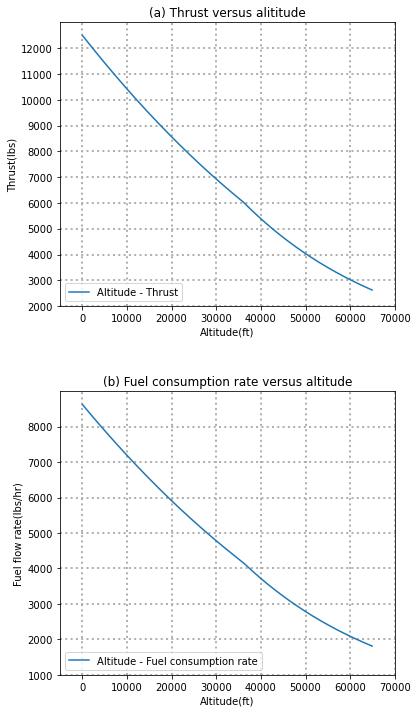

In [77]:
h1,h2,h3=3.6089e4,6.5616e4,9.0e4 #依次给定三个临界高度
a0,a2,g=-3.567e-3,5.494e-4,32.2 #给定lamda值，重力加速度(ft/s^2)
R=1716 #大气气体常数
T0,p0,rho0=518.67,2116.2,2.3769e-3 
#给定三个标准海平面大气参数值，温度(兰氏温度)，压强（lbf/ft^2），密度(slug/ft^3/(lbf*s^2/ft^4))
T1=T0+a0*h1
p1=p0*(T1/T0)**(-g/a0/R)
rho1=rho0*(T1/T0)**(-g/a0/R-1)
#对流层温度线性变化，其余两个参数代入公式
T2=T1
p2=p1*math.exp(-g/R/T2*(h2-h1))
rho2=rho1*math.exp(-g/R/T2*(h2-h1))
#平流层温度变化不大，温度近似为定值
#上述过程完成数据初始化

alt=range(0,65000,100) #优化代码，省去i变量定位，因为matplotlib自动将list转化为numpy数组
T=np.zeros(len(alt))
Fr=np.zeros(len(alt))
Tsmax,m,c=12500,0.6,0.69
for i in range(len(alt)):
    Temp,Pr,rho=StdAtpUS(alt[i])
    T[i]=((rho/rho0)**m)*Tsmax
    Fr[i]=T[i]*c
    pass
fig=plt.figure(figsize=(6,12)) #画布
fig.subplots_adjust(hspace=0.3,wspace=1) #设置子图距离

ax=fig.add_subplot(2,1,1) #第一张图
ax.plot(alt,T,label='Altitude - Thrust') #标签
plt.legend(loc='lower left') #标签位置
ax.set_xlabel("Altitude(ft)")
ax.set_ylabel("Thrust(lbs)") #x-y坐标标签
ax.grid(linestyle=':',linewidth=2) #网格线样式
ax.set_title("(a) Thrust versus alititude") #标题
plt.xlim(-5000,70000)
plt.ylim(2000,13000)
plt.yticks(np.arange(2000,13000,1000)) #xy坐标显示

ax=fig.add_subplot(2,1,2) #注释同上
ax.plot(alt,Fr,label='Altitude - Fuel consumption rate')
plt.legend(loc='lower left')
ax.set_xlabel("Altitude(ft)")
ax.set_ylabel("Fuel flow rate(lbs/hr)")
ax.grid(linestyle=':',linewidth=2)
ax.set_title("(b) Fuel consumption rate versus altitude")
plt.xlim(-5000,70000)
plt.ylim(1000,9000)
plt.yticks(np.arange(1000,9000,1000))

plt.show()

In [67]:
def StdAtpUS(h):
    #输入高度值，返回该高度下的温度，压强，密度
    global h1,h2,h3,a0,a2,g,R,T0,p0,rho0,T1,p1,rho1,T2,p2,rho2
    #声明使用的全局变量，这样不用在每次调用函数时都计算一遍，提升代码性能
    if h<=h1:
        #print('Troposphere'对流层)
        T=T0+a0*h
        p=p0*(T/T0)**(-g/a0/R-1)
        rho=rho0*(T/T0)**(-g/a0/R-1)
        pass
    elif h1<=h<=h2:
        #print('Tropopouse'对流层顶部)
        T=T1
        p=p1*math.exp(-g/R/T*(h-h1))
        rho=rho1*math.exp(-g/R/T*(h-h1))
        pass
    elif h2<=h<=h3:
        #print('Statosphere'平流层)
        T=T2+a2*(h-h2)
        p=p2*(T/T2)**(-g/a2/R)
        rho=rho2*(T/T2)**(-g/a2/R-1)
        pass
    else:
        #print('Error:the alititude should be less than 9000 ft'超过高度范围，警告！)
        pass
    return T,p,rho